In [1]:
import pandas as pd
import numpy as np

csv = pd.read_csv("/home/hduser/Dropbox/Analytics/BDA104/titanic2.csv",sep=",")

file_dir = '/home/hduser/Dropbox/Analytics/nfl_draft_2019/data/'
file_name = 'imputed_data.csv'

# read data
#csv = pd.read_csv(file_dir + file_name)
# clean raw data
#csv.drop(['Unnamed: 0','num_missing_vals'], axis=1, inplace=True)
csv = pd.get_dummies(data=csv,columns=["Sex"])


In [12]:
csv

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C,1,0


In [2]:
# Data exploration - let's have some fun with charts

csv_1st_xyz = csv.query('Survived==1')[['Pclass','Age','Fare','Name',"Sex_male"]]
csv_rest_xyz = csv.query('Survived==0')[['Pclass','Age','Fare','Name',"Sex_male"]]

#csv_rest_xyz = csv.query('first_round_pick==0')[['pick','forty','height_inches','weight','player']]


In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='onesonesones', api_key='94vQkVs9TQiJcvfmznZj')




In [4]:
trace1 = go.Scatter3d(
    x=csv_1st_xyz['Sex_male'],
    y=csv_1st_xyz['Age'],
    z=csv_1st_xyz['Fare'],
    text = csv_1st_xyz['Name'],
    mode='markers',
    marker=dict(
        size=1,
        symbol='cross',
        line=dict(
            color='rgb(255, 0, 0)',
            width=0.1
        ),
        opacity=1
    )
)


In [5]:
trace2 = go.Scatter3d(
    x=csv_rest_xyz['Sex_male'],
    y=csv_rest_xyz['Age'],
    z=csv_rest_xyz['Fare'],
    text = csv_rest_xyz['Name'],
    mode='markers',
    marker=dict(
        size=1,
        symbol='circle',
        line=dict(
            color='rgb(0, 0, 0)',
            width=0.01
        ),
        opacity=1
    )
)


In [8]:
data = [trace1, trace2]
#layout = go.Layout(
#    margin=dict(
#        l=0,
#        r=0,
#        b=0,
#        t=0
#    )
#)

layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='X - Gender'),
                    yaxis = dict(
                        title='Y - Age'),
                    zaxis = dict(
                        title='Z - Fare'),),
                    width=700,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )


In [9]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='titanic-3d-scatter')

# interesting graph which shows that faster players (red) are drafted earlier 
# than slower ones

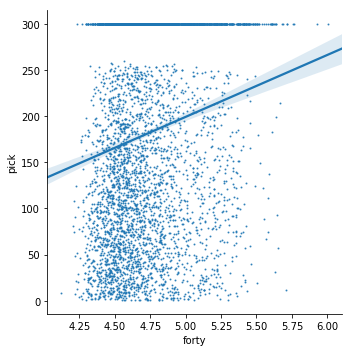

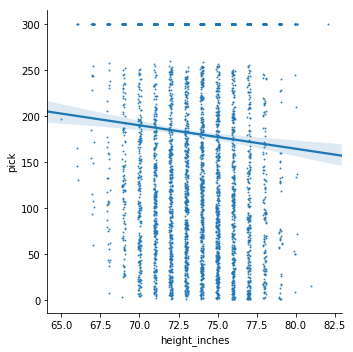

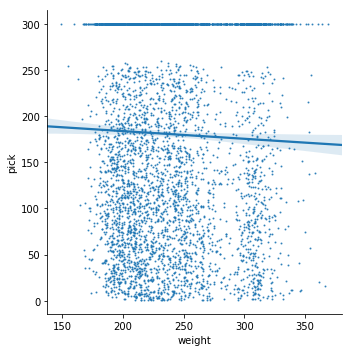

In [11]:
import seaborn as sns
sns.lmplot(x='forty',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})
sns.lmplot(x='height_inches',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})
sns.lmplot(x='weight',y='pick',x_jitter=.1,y_jitter=.1,data=csv,scatter_kws={"s": 1})




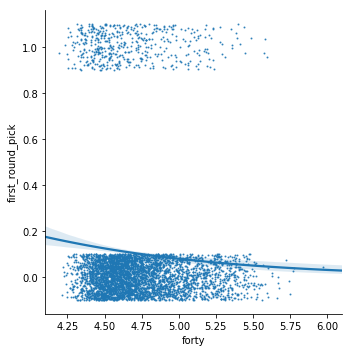

In [15]:

sns.lmplot(x='forty',y='first_round_pick',data=csv,
          logistic=True,x_jitter=.1,y_jitter=.1,scatter_kws={"s": 1})


